Experiment 1:
Objective:
To forecast future values of a univariate time series using LSTM-based models.**bold text**

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-8c76d788dd10>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - loss: 0.0134
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 8.8454e-04
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 7.3021e-04
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 7.8121e-04
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 6.5465e-04
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 7.9618e-04
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 5.8443e-04
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.9243e-04
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 5.4993e-04
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 4.4673e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
RMSE: 15.402443022369066
MAE: 12.012664810460358


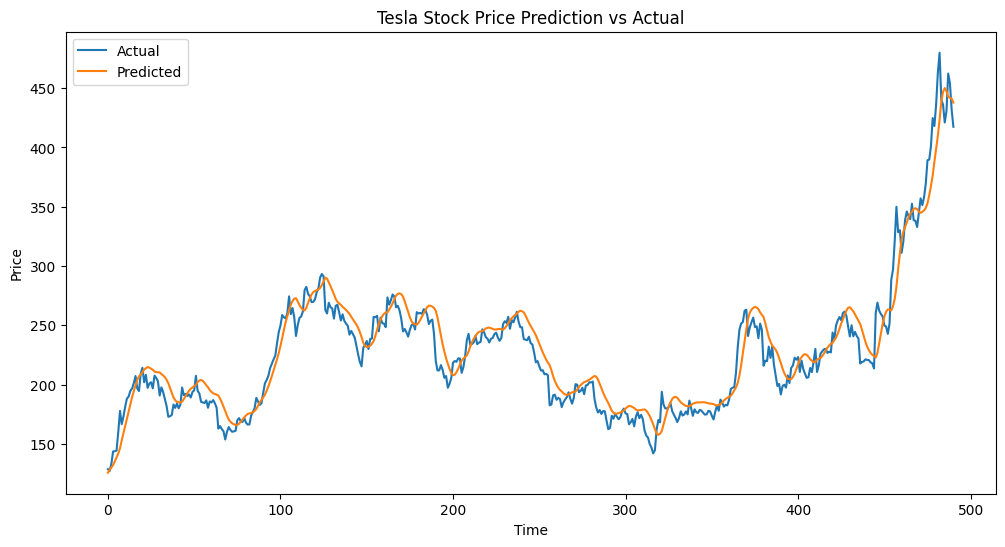

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import yfinance as yf

# 1. Load Tesla data
df = yf.download('TSLA', start='2015-01-01', end='2024-12-31')
data = df[['Close']]
data.dropna(inplace=True)

# 2. Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 3. Create sequences
def create_sequences(data, seq_len=60):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# 4. Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5. Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 6. Train
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 7. Predict
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)

# 8. Evaluation
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
mae = mean_absolute_error(y_test_actual, predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# 9. Plot
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Tesla Stock Price Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


Total sequences: 1139911


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
8906/8906 ━━━━━━━━━━━━━━━━━━━━ 127s 14ms/step - accuracy: 0.4082 - loss: 2.0302
Epoch 2/5
8906/8906 ━━━━━━━━━━━━━━━━━━━━ 141s 14ms/step - accuracy: 0.5810 - loss: 1.3881
Epoch 3/5
8906/8906 ━━━━━━━━━━━━━━━━━━━━ 142s 14ms/step - accuracy: 0.6119 - loss: 1.2718
Epoch 4/5
8906/8906 ━━━━━━━━━━━━━━━━━━━━ 142s 14ms/step - accuracy: 0.6286 - loss: 1.2076
Epoch 5/5
8906/8906 ━━━━━━━━━━━━━━━━━━━━ 124s 14ms/step - accuracy: 0.6401 - loss: 1.1638


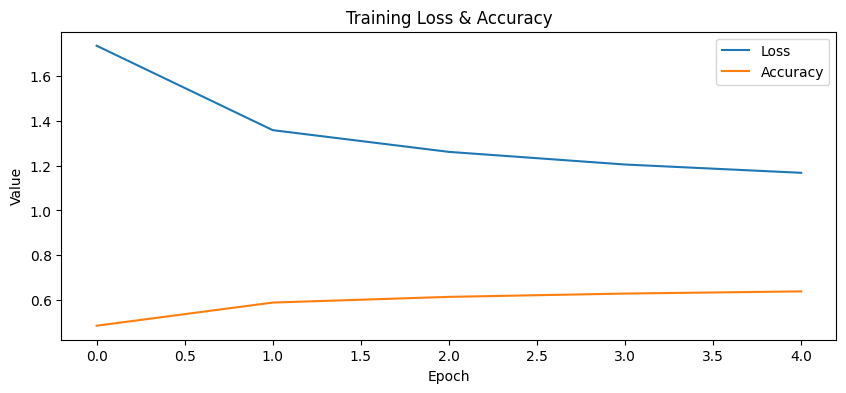

harry looked around the room and sawiiy  s s                                                                                                                                                                                                                                                                                                    


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import re

# 1. Load and clean text
with open('/content/07 Harry Potter and the Deathly Hallows.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()
text = re.sub(r'[^a-zA-Z .,!?\']', ' ', text)

# 2. Create character to integer mapping
chars = sorted(list(set(text)))
char_to_int = {c: i for i, c in enumerate(chars)}
int_to_char = {i: c for c, i in char_to_int.items()}

# 3. Create sequences
seq_length = 100
step = 1
sequences = []
next_chars = []

for i in range(0, len(text) - seq_length, step):
    sequences.append(text[i:i+seq_length])
    next_chars.append(text[i + seq_length])

print("Total sequences:", len(sequences))

# 4. Encode sequences
X = np.zeros((len(sequences), seq_length, len(chars)), dtype=np.bool_)
y = np.zeros((len(sequences), len(chars)), dtype=np.bool_)

for i, seq in enumerate(sequences):
    for t, char in enumerate(seq):
        X[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1

# 5. Build LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(seq_length, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 6. Train
history = model.fit(X, y, batch_size=128, epochs=5)

# 7. Plot loss/accuracy
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Training Loss & Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

# 8. Text Generation Function
def generate_text(seed_text, length=300):
    generated = seed_text.lower()
    for _ in range(length):
        x_pred = np.zeros((1, seq_length, len(chars)))
        for t, char in enumerate(seed_text):
            if char in char_to_int:
                x_pred[0, t, char_to_int[char]] = 1
        pred = model.predict(x_pred, verbose=0)[0]
        next_index = np.argmax(pred)
        next_char = int_to_char[next_index]

        generated += next_char
        seed_text = seed_text[1:] + next_char
    return generated

# Example generation
seed = "Harry looked around the room and saw"
print(generate_text(seed))


Experiment 3: Sequence Text Classification using LSTM
 Objective:
To classify text sequences using LSTM-based models (e.g., sentiment or spam detection).

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8599 - loss: 0.4469 - val_accuracy: 0.8655 - val_loss: 0.4002
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8709 - loss: 0.3990 - val_accuracy: 0.8655 - val_loss: 0.3958
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8657 - loss: 0.4001 - val_accuracy: 0.8655 - val_loss: 0.3993
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8667 - loss: 0.4004 - val_accuracy: 0.8655 - val_loss: 0.3954
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8712 - loss: 0.3930 - val_accuracy: 0.8655 - val_loss: 0.3961
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Classification Report:

              precision    recall  f1-score   support

         Ham       0.87      1.00      0.93       965
        Spam       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


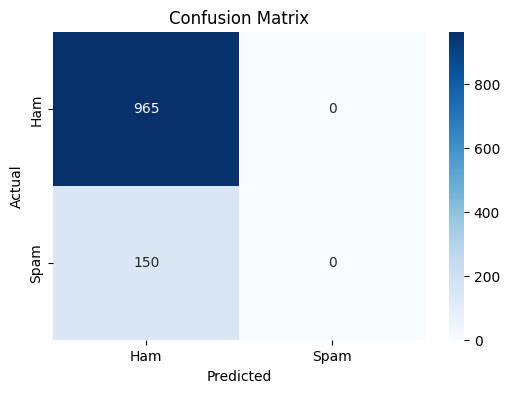

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# 1. Load dataset
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# 3. Tokenize and pad
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# 4. Build model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. Train
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

# 6. Evaluate
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

# 7. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Declaration **bold text**

I, Shivanjali Jagtap, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:
GitHub Repository Link: [Insert GitHub Link]
Signature: Shivanjali Jagtap
